In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

2).Data Visualization and Exploration

In [125]:
data=pd.read_csv("kyphosis.csv")

In [126]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [127]:
kyphosis.shape

(81, 4)

In [128]:
kyphosis.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [129]:
kyphosis.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [130]:
kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<AxesSubplot:xlabel='Number', ylabel='Age'>

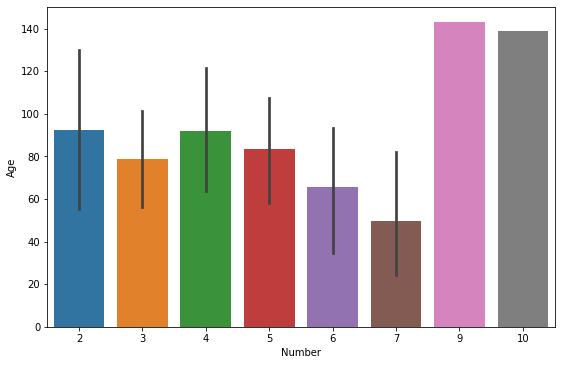

In [131]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(y='Age',x='Number', data=kyphosis)

<AxesSubplot:xlabel='Start', ylabel='Age'>

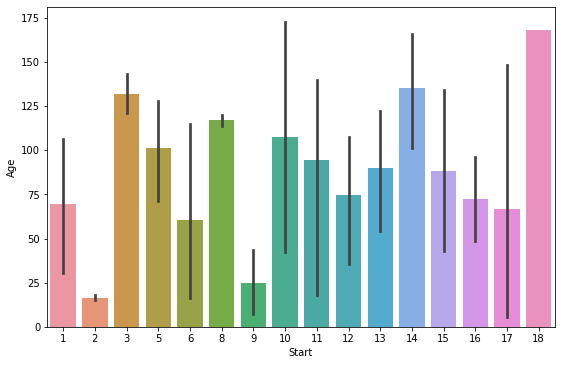

In [198]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(y='Age',x='Start', data=kyphosis)

<AxesSubplot:xlabel='Number', ylabel='Start'>

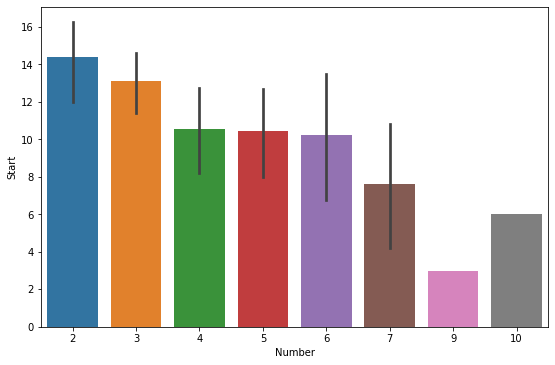

In [200]:
plt.figure(figsize=(20,20))
plt.subplot(324)
sns.barplot(y='Start',x='Number', data=kyphosis)

<AxesSubplot:xlabel='Age', ylabel='count'>

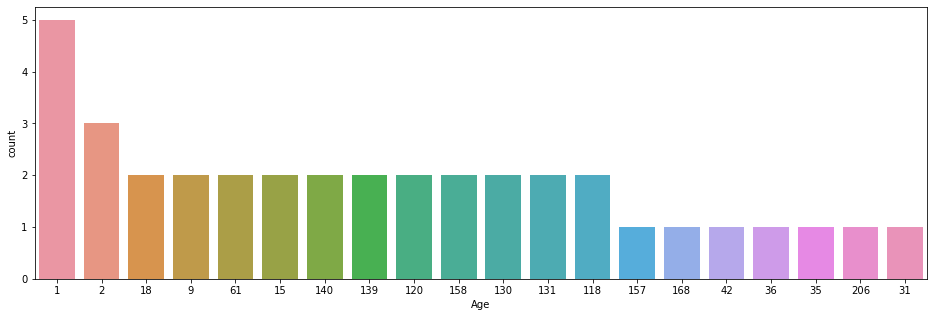

In [132]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age', data=kyphosis, order=data['Age'].value_counts().iloc[:20].index)

# 3). Data Pre-processing and Cleaning

In [157]:
kyphosis.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

C:\Users\monug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

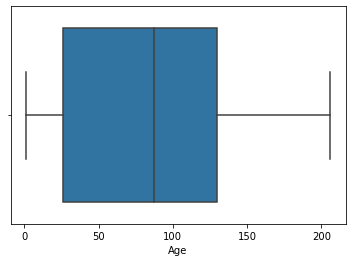

In [158]:
sns.boxplot(kyphosis["Age"],orient='h')

In [159]:
data['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [164]:
kyphosis['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [177]:
kyphosis['Kyphosis'].nunique()

2

In [178]:
for columns in kyphosis:
    if(columns=='kyphosis'):
                kyphosis[columns]=kyphosis.map({'absent':0,'present':1})

In [179]:
kyphosis['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# 4. Data Preparation.
     a).Do the final features selection and extractthem into Columns X and the class label into Column into Y.
     b).Split dataset into training nad test sets.

In [207]:
x=kyphosis.drop(['Kyphosis'],axis=1)
y=kyphosis['yphosis']

In [208]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [209]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [204]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [197]:
X_train.shape,X_test.shape

((64, 3), (17, 3))

# PART(B)

1). Model Building

# LogisticRegression

In [238]:
x=data.drop(['Kyphosis'],axis=1)
y=data['Kyphosis']

In [239]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [240]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [243]:
log_reg = LogisticRegression()

In [244]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [245]:
y_pred=log_reg.predict(x_test)

In [246]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [247]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [248]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8823529411764706


In [249]:
confusion_matrix(y_test, y_pred)

array([[15,  0],
       [ 2,  0]], dtype=int64)

# K-Nearest-Neighbour

In [257]:
x=kyphosis.drop(['Kyphosis'],axis=1)
y=kyphosis['Kyphosis']

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [260]:
from sklearn.metrics import accuracy_score, confusion_matrix
k_range=list(range(3,10))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

In [261]:
acc

[0.5882352941176471,
 0.9411764705882353,
 0.5882352941176471,
 0.8235294117647058,
 0.6470588235294118,
 0.8823529411764706,
 0.7058823529411765]